# 什么是主题模型

- 文本分类，如新闻属于科技类、体育类、还是经济类等等，基于词袋模型
- LDA(Latent Dirichlet Allocation)，无监督的贝叶斯模型；
    - 基于词袋模型，文档由一组词构成的一个集合，词与词之间没有顺序及先后的关系。
    - 一篇文档可以包含多个主题，文档中每一个词都由其中的一个主题生成
    
    - 一种主题模型，将文档集中每篇文档的主题按照概率分布的形式给出；
    - 无监督算法，在训练时不需要手工标注的训练集，需要的仅仅是文档集以及指定主题的数量k即可；
    - 训练得到的模型，对于每一个主题都可找出一些词语描述它。
    

- 用概率作为可信度
- 每次看见新数据，都更新可信度
- 需要一个模型来解释数据的生成

P(主题|文档) = P(主题)*P(文档|主题)
后验概率，先验概率，似然概率(生成模型)

一篇文章的每个词都是以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语而组成
P(单词|文档)=P(单词|主题)*P(主题|文档)

对于语库中的每篇文档，LDA 定义了如下生成过程(generative process)：
- 对每一篇文档，从主题分布中抽取一个主题
- 从上述被抽到的主题所对应的单词分布中抽取一个单词
- 重复上述过程直至遍历⽂文档中的每一个单词

具体来说：w代表单词；d代表文档；t代表主题；大写代表总集合，小写代表个体。
- D 中每个文档 d 都可看作一个单词序列 $<w_1,w_2,...,w_n>$，$w_i$表示第 i 个单词
- D 中涉及的所有不同单词组成一个词汇表V，LDA以文档集合D作为输入，希望训练出两个结果向量（假设形成 k 个主题，V中一共m个单词）
    - 对D中的每个文档d，对应到不同主题的概率 $<p_{t_1},p_{t_2},...,p_{t_k}>$，其中，$p_{t_i}$ 表示d对应T中第i个主题的概率。$p_{t_i}=n_{t_i}/n$，其中 $n_{t_i}$ 表示 d 中对应第 i 个主题的词的数目，n 表示 d 中所有词的总数
    - 对每个T中的主题，生成不同单词的概率$<p_{w_1},p_{w_2},...,p_{w_m}>$，其中，pwi 表示t生成V中第i个单词的概率。$p_{w_i} = N_{w_i}/N$，其中 $Nwi$ 表示对应到第 t 个主题的单词 wi 的数量，N表示对应到主题 t 的单词的总数
    
    
$P(w|d)=P(w|t)*P(t|d)  $  

### 给定以下句子：
- `I like to eat broccoli and bananas.`
- `I ate a banana and spinach smoothie for breakfast.`
- `Chinchillas and kittens are cute.`
- `My sister adopted a kitten yesterday.`
- `Look at this cute hamster munching on a piece of broccoli.`
    
### LDA用来自动发现句子或文档包含的主题；
例如，给定上述句子，已知主题数目为 2，`LDA`产生下述结果：
- 句子 1 和 2：100% 属于主题 `A`
- 句子 3 和 4：100% 属于主题 `B`
- 句子 5：60% 主题 `A`，40% 主题 `B`
- 主题 A：`30% broccoli, 15% bananas, 10% breakfast, 10% munching...`，可以认为主题 `A` 表示**食物**
- 主题 B：`20% chinchillas, 20% kittens, 20% cute, 15% hamster...`，可以认为主题 `B` 表示**动物**

### LDA模型假设每个文档按下列方式生成：
- 每个文档可以描述成 `k` 个主题的概率分布，每个主题可以描述成单词集的概率分布
- 决定每个文档的单词数 N，例如：**泊松分布**生成 N 的值
- 为文档选择一个概率分布，例如：k 个主题，**Dirichlet分布**确定属于每个主题的概率，上例中的 1/3 的食物主题 + 2/3 的动物主题
- 按以下方法，生成文档中的每个单词：
    - 选择一个主题，1/3 的概率选择到食物主题，2/3 的概率选择到动物主题
    - 使用上一步选择的主题，生成单词；例如，选择到食物主题，则 30% 概率生成 `broccoli`, 15% 概率生成 `bananas`
    - 重复，直至生成所有 N 个单词
- 生成句子过程如下：
    - 选择文档单词数为 5
    - 1/2 食物主题 + 1/2 动物主题
    - 从食物主题中选择第1个单词，`broccoli`
    - 从动物主题中选择第2个单词，`panda`
    - 从动物主题中选择第3个单词，`adorable`
    - 从食物主题中选择第4个单词，`cherries`
    - 从动物主题中选择第5个单词，`eating`
    - 生成的句子为：`broccoli panda adorable cherries eating`
    

### LDA的学习过程
- 给定文档集合，已知有 `K` 个主题，LDA需要学习到每个文档的主题和与该主题相关的单词。
- 一种方法，`Gibbs sampling`如下：
    - 遍历每个文档，给每个单词随机分配一个主题；该随机初始化的过程，已经给出了每个文档的主题，和每个主题相关的单词分布
    - 遍历每个文档 `d` 中的单词 `w`
        - 对于每个主题 `t`，计算：1)$P(t|d)=\frac{N_t}{N}$，$N_t$ 为文档 `d` 中分配给主题 `t` 的单词个数，$N$ 为文档 `d` 的总单词数；2)$P(w|t)=\frac{N_w}{N}$，$N_w$ 为**所有文档**中所有的单词 `w` 中被分配给主题 `t` 的数量，$N$ 表示分配给主题 `t` 的单词总数
        - 给单词 `w` 重新分配一个主题，选择任一主题 `t` 的概率为 $P(t|d)*P(w|t)$
        - 在上一步中，是在假设所有的主题分配都是正确的，除了当前单词
    - 重复上述步骤，直至稳定，即可获得每个文档的主题和每个主题对应的单词
    
### LDA的用途
- 如上所述的文本分类，无监督学习
- 降维，将词袋模型表征的文档向量`{Word_i: count(Word_i, T) for Word_i in Vocabulary}`，降维为`{Topic_i: Weight(Topic_i, T) for Topic_i in Topics}`

# 希拉里邮件分类:gensim

In [1]:
import numpy as np
import pandas as pd
import re

## 文本预处理

In [2]:
df = pd.read_csv("../datasets/HillaryEmails.csv")
df = df[['Id', 'ExtractedBodyText']].dropna()
df.head()

,Id,ExtractedBodyText
1,2,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,3,Thx
4,5,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,6,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
7,8,"H <hrod17@clintonemail.corn>\nFriday, March 11..."


In [3]:
def clean_email_text(text):
    text = text.replace('\n', " ")  # 替换换行符
    text = re.sub(r"-", " ", text)  # 把 "-" 的两个单词，分开。（比如：july-edu ==> july edu）
    text = re.sub(r"\d+/\d+/\d+", "", text)  # 日期，对主体模型没什么意义
    text = re.sub(r"[0-2]?[0-9]:[0-6][0-9]", "", text)  # 时间，没意义
    text = re.sub(r"[\w]+@[\.\w]+", "", text)  # 邮件地址，没意义
    text = re.sub(
        r"/[a-zA-Z]*[:\//\]*[A-Za-z0-9\-_]+\.+[A-Za-z0-9\.\/%&=\?\-_]+/i", "",
        text)  # 网址，没意义
    pure_text = ''
    # 以防还有其他特殊字符（数字）等等，我们直接把他们loop一遍，过滤掉
    for letter in text:
        # 只留下字母和空格
        if letter.isalpha() or letter == ' ':
            pure_text += letter
    # 再把那些去除特殊字符后落单的单词，直接排除。
    # 我们就只剩下有意义的单词了。
    text = ' '.join(word for word in pure_text.split() if len(word) > 1)
    return text

In [4]:
docs = df['ExtractedBodyText']
docs = docs.apply(lambda s: clean_email_text(s))
docs.head(5).values

array(['Thursday March PM Latest How Syria is aiding Qaddafi and more Sid hrc memo syria aiding libya docx hrc memo syria aiding libya docx March For Hillary',
       'Thx',
       'Friday March PM Huma Abedin Fw Latest How Syria is aiding Qaddafi and more Sid hrc memo syria aiding libya docx Pis print',
       'Pis print Wednesday September PM Fw Meet The Right Wing Extremist Behind Anti fvluslim Film That Sparked Deadly Riots From meat Sent Wednesday September PM To Subject Meet The Right Wing Extremist Behind Anti Muslim Film That Sparked Deadly Riots httemaxbiumenthalcommeet the right wing extremist behind anti musiim tihn that sparked deadly riots Sent from my Verizon Wireless LTE DROID US Department of State Case No Doc No Date STATE DEPT PRODUCED TO HOUSE SELECT BENGHAZI COMM SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION REDACTIONS NO FOIA WAIVER STATE CB',
       'Friday March PM Huma Abedin Fw Latest How Syria is aiding Qaddafi and more Sid hrc memo Syria aiding libya docx Pis

In [5]:
doclist = docs.values
len(doclist)

6742

## LDA模型

In [6]:
from gensim import corpora, models, similarities
import gensim

### 文本预处理

In [7]:
stoplist = [
    'very', 'ourselves', 'am', 'doesn', 'through', 'me', 'against', 'up',
    'just', 'her', 'ours', 'couldn', 'because', 'is', 'isn', 'it', 'only',
    'in', 'such', 'too', 'mustn', 'under', 'their', 'if', 'to', 'my',
    'himself', 'after', 'why', 'while', 'can', 'each', 'itself', 'his', 'all',
    'once', 'herself', 'more', 'our', 'they', 'hasn', 'on', 'ma', 'them',
    'its', 'where', 'did', 'll', 'you', 'didn', 'nor', 'as', 'now', 'before',
    'those', 'yours', 'from', 'who', 'was', 'm', 'been', 'will', 'into',
    'same', 'how', 'some', 'of', 'out', 'with', 's', 'being', 't', 'mightn',
    'she', 'again', 'be', 'by', 'shan', 'have', 'yourselves', 'needn', 'and',
    'are', 'o', 'these', 'further', 'most', 'yourself', 'having', 'aren',
    'here', 'he', 'were', 'but', 'this', 'myself', 'own', 'we', 'so', 'i',
    'does', 'both', 'when', 'between', 'd', 'had', 'the', 'y', 'has', 'down',
    'off', 'than', 'haven', 'whom', 'wouldn', 'should', 've', 'over',
    'themselves', 'few', 'then', 'hadn', 'what', 'until', 'won', 'no', 'about',
    'any', 'that', 'for', 'shouldn', 'don', 'do', 'there', 'doing', 'an', 'or',
    'ain', 'hers', 'wasn', 'weren', 'above', 'a', 'at', 'your', 'theirs',
    'below', 'other', 'not', 're', 'him', 'during', 'which'
]

In [8]:
# 将句子转化成单词列表
texts = [[word for word in doc.lower().split() if word not in stoplist]
         for doc in doclist]

In [9]:
print(texts[0])

['thursday', 'march', 'pm', 'latest', 'syria', 'aiding', 'qaddafi', 'sid', 'hrc', 'memo', 'syria', 'aiding', 'libya', 'docx', 'hrc', 'memo', 'syria', 'aiding', 'libya', 'docx', 'march', 'hillary']


In [12]:
# 词典
dictionary = corpora.Dictionary(texts)

# 将单词列表转换成向量
corpus = [dictionary.doc2bow(text) for text in texts]

# 返回每个 doc 对应的单词及词频
print(corpus[5000])

[(508, 1), (1105, 1), (1240, 1), (1366, 1), (12077, 1), (14707, 1), (15952, 1), (23389, 1)]


### 模型

In [13]:
# 训练模型
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=20,
)

In [14]:
# 打印第 i 个主题
lda.print_topic(10, topn=5)

'0.059*"ok" + 0.022*"israeli" + 0.021*"israel" + 0.012*"jerusalem" + 0.011*"israels"'

In [15]:
# 打印最显著的主题
lda.print_topics(num_topics=10, num_words=5)

[(19,
  '0.012*"labour" + 0.008*"pm" + 0.008*"would" + 0.008*"well" + 0.007*"best"'),
 (3,
  '0.078*"pm" + 0.040*"office" + 0.031*"secretarys" + 0.023*"meeting" + 0.022*"room"'),
 (7,
  '0.018*"pls" + 0.015*"discuss" + 0.007*"forgot" + 0.007*"hair" + 0.006*"call"'),
 (4,
  '0.015*"im" + 0.013*"tomorrow" + 0.012*"call" + 0.012*"talk" + 0.010*"also"'),
 (16,
  '0.038*"pm" + 0.024*"huma" + 0.020*"fw" + 0.019*"release" + 0.019*"part"'),
 (17,
  '0.041*"yes" + 0.015*"add" + 0.014*"call" + 0.012*"website" + 0.011*"arizona"'),
 (12,
  '0.009*"new" + 0.007*"would" + 0.006*"obama" + 0.006*"mr" + 0.006*"right"'),
 (9,
  '0.017*"bloomberg" + 0.008*"state" + 0.008*"language" + 0.005*"us" + 0.005*"could"'),
 (8,
  '0.065*"fyi" + 0.015*"cheryl" + 0.011*"mills" + 0.010*"see" + 0.009*"kurdistan"'),
 (0,
  '0.014*"call" + 0.012*"negotiating" + 0.011*"sent" + 0.010*"message" + 0.009*"blackberry"')]

### 使用模型

In [16]:
# 单词所属的主题
lda.get_term_topics(dictionary.token2id["meeting"])

[(3, 0.023184743)]

In [17]:
lda.print_topic(4)

'0.015*"im" + 0.013*"tomorrow" + 0.012*"call" + 0.012*"talk" + 0.010*"also" + 0.009*"get" + 0.009*"know" + 0.008*"see" + 0.007*"want" + 0.007*"need"'

In [18]:
lda.print_topic(9)

'0.017*"bloomberg" + 0.008*"state" + 0.008*"language" + 0.005*"us" + 0.005*"could" + 0.004*"organizing" + 0.004*"worse" + 0.004*"see" + 0.004*"mike" + 0.004*"polls"'

In [19]:
# 预测文本所属的主题
test_texts = """
To all the little girls watching...never doubt that you are valuable and powerful & deserving of every chance & opportunity in the world.

I was greeted by this heartwarming display on the corner of my street today. Thank you to all of you who did this. Happy Thanksgiving. -H

Hoping everyone has a safe & Happy Thanksgiving today, & quality time with family & friends. -H

Scripture tells us: Let us not grow weary in doing good, for in due season, we shall reap, if we do not lose heart.

Let us have faith in each other. Let us not grow weary. Let us not lose heart. For there are more seasons to come and...more work to do

We have still have not shattered that highest and hardest glass ceiling. But some day, someone will

To Barack and Michelle Obama, our country owes you an enormous debt of gratitude. We thank you for your graceful, determined leadership

Our constitutional democracy demands our participation, not just every four years, but all the time

You represent the best of America, and being your candidate has been one of the greatest honors of my life

Last night I congratulated Donald Trump and offered to work with him on behalf of our country

Already voted? That's great! Now help Hillary win by signing up to make calls now

It's Election Day! Millions of Americans have cast their votes for Hillary—join them and confirm where you vote

We don’t want to shrink the vision of this country. We want to keep expanding it

We have a chance to elect a 45th president who will build on our progress, who will finish the job

"""

In [26]:
test_doc_list = [[
    word for word in clean_email_text(doc).lower().split()
    if word not in stoplist
] for doc in test_texts.split('\n') if doc.strip()]

In [27]:
# 进行主题预测
doc_vec = [dictionary.doc2bow(doc) for doc in test_doc_list][:5]
for i, doc in enumerate(doc_vec):
    topics = lda[doc]
    print(doclist[i])
    print('_' * 80)    
    print(f"Best Topic : {topics[0][0]} : ", lda.print_topic(topics[0][0]))
    print()

Thursday March PM Latest How Syria is aiding Qaddafi and more Sid hrc memo syria aiding libya docx hrc memo syria aiding libya docx March For Hillary
________________________________________________________________________________
Best Topic : 13 :  0.010*"us" + 0.006*"would" + 0.006*"said" + 0.005*"people" + 0.005*"new" + 0.005*"one" + 0.004*"american" + 0.004*"un" + 0.004*"government" + 0.004*"security"

Thx
________________________________________________________________________________
Best Topic : 7 :  0.018*"pls" + 0.015*"discuss" + 0.007*"forgot" + 0.007*"hair" + 0.006*"call" + 0.006*"remind" + 0.006*"emailed" + 0.005*"missing" + 0.005*"tell" + 0.005*"nd"

Friday March PM Huma Abedin Fw Latest How Syria is aiding Qaddafi and more Sid hrc memo syria aiding libya docx Pis print
________________________________________________________________________________
Best Topic : 4 :  0.015*"im" + 0.013*"tomorrow" + 0.012*"call" + 0.012*"talk" + 0.010*"also" + 0.009*"get" + 0.009*"know" + 0

In [28]:
# stop_list, dictionary, lda

In [38]:
test_doc_list

[['little',
  'girls',
  'watchingnever',
  'doubt',
  'valuable',
  'powerful',
  'deserving',
  'every',
  'chance',
  'opportunity',
  'world'],
 ['greeted',
  'heartwarming',
  'display',
  'corner',
  'street',
  'today',
  'thank',
  'happy',
  'thanksgiving'],
 ['hoping',
  'everyone',
  'safe',
  'happy',
  'thanksgiving',
  'today',
  'quality',
  'time',
  'family',
  'friends'],
 ['scripture',
  'tells',
  'us',
  'let',
  'us',
  'grow',
  'weary',
  'good',
  'due',
  'season',
  'shall',
  'reap',
  'lose',
  'heart'],
 ['let',
  'us',
  'faith',
  'let',
  'us',
  'grow',
  'weary',
  'let',
  'us',
  'lose',
  'heart',
  'seasons',
  'come',
  'andmore',
  'work'],
 ['still',
  'shattered',
  'highest',
  'hardest',
  'glass',
  'ceiling',
  'day',
  'someone'],
 ['barack',
  'michelle',
  'obama',
  'country',
  'owes',
  'enormous',
  'debt',
  'gratitude',
  'thank',
  'graceful',
  'determined',
  'leadership'],
 ['constitutional',
  'democracy',
  'demands',
  'par

In [40]:
# 返回句子对应的主题的权重分布，可以用作该句子的句向量

bow = dictionary.doc2bow(test_doc_list[0])
print(bow)

lda.inference([bow])

(array([[0.05    , 0.05    , 0.05    , 0.05    , 0.05    , 0.05    ,
         0.05    , 0.05    , 0.05    , 0.05    , 0.05    , 0.05    ,
         0.05    , 9.046117, 0.05    , 0.05    , 0.05    , 0.05    ,
         0.05    , 0.05    ]], dtype=float32),
 None)

In [53]:
# 返回段落对应的权重分布，可以用作段落向量
bow = dictionary.doc2bow([w for doc in test_doc_list for w in doc])
bow

# 段落对应的权重分布
lda.inference([bow])

(array([[5.0000001e-02, 5.0000001e-02, 5.0000001e-02, 1.4875929e+00,
         1.9909754e+01, 2.5722785e+00, 5.0000001e-02, 5.0000001e-02,
         5.0000001e-02, 5.0000001e-02, 5.0000001e-02, 5.0000001e-02,
         5.0000001e-02, 7.8837059e+01, 1.1592243e+01, 1.1613413e+00,
         5.0000001e-02, 5.0000001e-02, 4.1515293e+00, 5.0000001e-02]],
       dtype=float32),
 None)

# NIPS论文分类:sklearn

In [43]:
import pandas as pd
import os

papers = pd.read_csv("../datasets/papers.csv")
papers.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [44]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=-1)
papers.head(5)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [45]:
# 数据清洗
import re
papers['paper_text_processed'] = papers['paper_text'].map(
    lambda x: re.sub('[,\.!?]', '', x))
papers['paper_text_processed'] = papers['paper_text_processed'].map(
    lambda x: x.lower())
papers['paper_text_processed'].head(5)

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

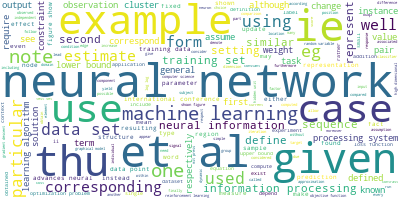

In [46]:
# 词云
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color='white',
                      max_words=1000,
                      contour_width=3,
                      contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

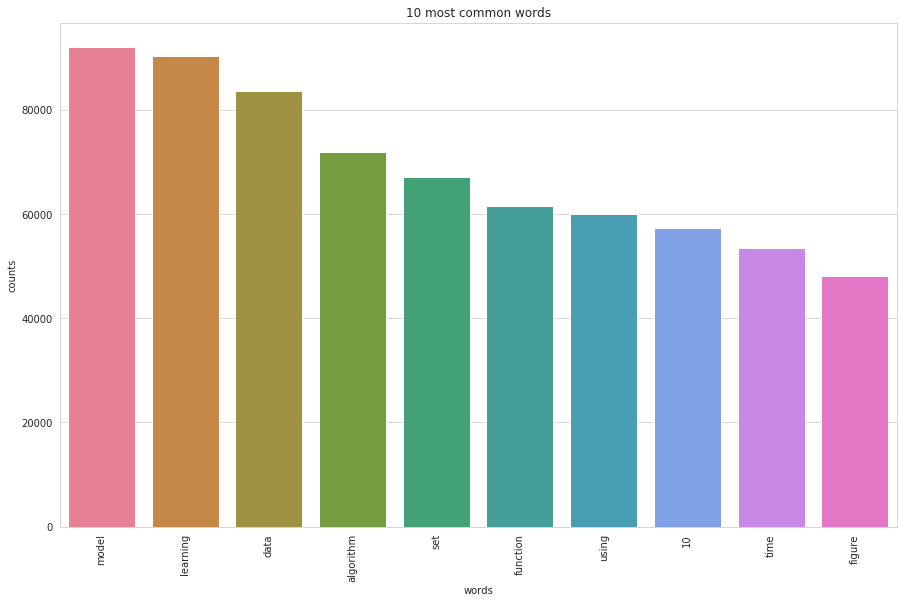

In [47]:
# 文本处理，词频统计
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    count_dict = zip(words, total_counts)
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15 / 1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
plot_10_most_common_words(count_data, count_vectorizer)

In [48]:
# 训练LDA模型
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA


def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join(
            [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


num_topics = 5
num_words = 10
lda = LDA(n_components=num_topics)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, num_words)

Topics found via LDA:

Topic #0:
algorithm data matrix log 10 learning distribution problem function set

Topic #1:
model data learning network models training neural using networks time

Topic #2:
algorithm function set learning problem 10 xi data optimization algorithms

Topic #3:
model image figure time images neurons data network object input

Topic #4:
learning set state algorithm action time policy model using number
